In [ ]:
#01
!pip install scikit-learn==1.1.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.2.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#02
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
#03
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
#04
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27


In [ ]:
#05
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#06
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#07
print('常數項',model.intercept_)
print('廻歸係數',model.coef_)

常數項 33.33497575563637
廻歸係數 [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [ ]:
#08
pd.DataFrame(zip(X.columns, model.coef_), columns=['變數','係數']).\
sort_values(by='係數', ascending=False)

,變數,係數
5,RM,3.902051
3,CHAS,3.238668
8,RAD,0.234854
2,INDUS,0.058211
1,ZN,0.037823
11,B,0.011770
9,TAX,-0.008213
6,AGE,-0.012851
0,CRIM,-0.128750
12,LSTAT,-0.547566


In [ ]:
#09
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(), LinearRegression())
model_pl.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#10
reg = model_pl.named_steps['linearregression']
pd.DataFrame(zip(X.columns, reg.coef_), columns=['變數','係數']).\
sort_values(by='係數', ascending=False)

,變數,係數
5,RM,2.808135
8,RAD,2.032761
11,B,1.041257
1,ZN,0.867933
3,CHAS,0.861838
2,INDUS,0.405028
6,AGE,-0.358669
0,CRIM,-0.988580
9,TAX,-1.364009
4,NOX,-1.900100


In [ ]:
#11
model_pl.named_steps.keys()

dict_keys(['standardscaler', 'linearregression'])

In [ ]:
#12
y_pred = model_pl.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 20.724023437339742
Mean Absolute Error: 3.148255754816832
R2 Score: 0.7261570836552478


In [ ]:
#13
y_train.iloc[0]

14.6

In [ ]:
#14
model_pl.predict(X_train.iloc[[0]])

array([18.94993353])

In [ ]:
#15
from sklearn.compose import ColumnTransformer
data_pl = ColumnTransformer([
    ('column_sel',StandardScaler(),X.columns[:3])
])
model_pl = make_pipeline(data_pl, LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 49.17549394985067
Mean Absolute Error: 5.158028841813333
R2 Score: 0.35020529596305805


In [ ]:
#16
data_pl = ColumnTransformer([
    ('column_sel','passthrough',['LSTAT'])
])
model_pl = make_pipeline(data_pl, LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


In [ ]:
# 中文處理
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"

fm.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
# 這一行能讓字體變得清晰
%config InlineBackend.figure_format = 'retina'
!pip install scikit-learn==1.1.3

--2024-04-22 08:08:01--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  11.7MB/s    in 0.9s    

2024-04-22 08:08:02 (11.7 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      


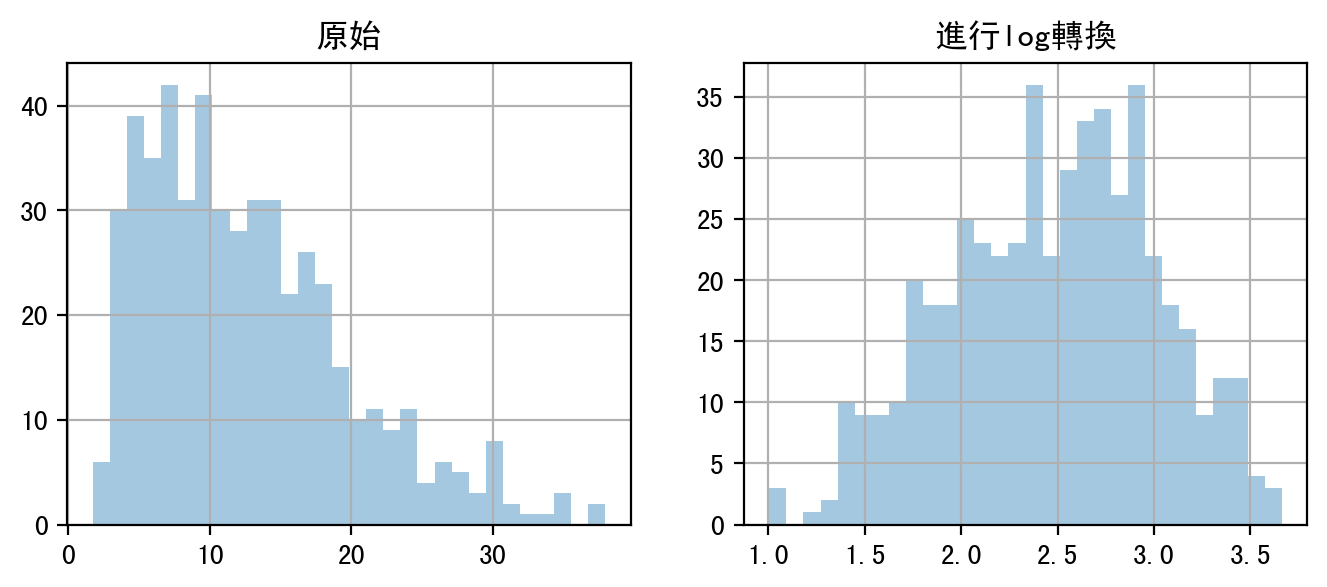

In [ ]:
#17
fig, axes = plt.subplots(1, 2, figsize=(8,3))
df['LSTAT'].hist(alpha=0.4, bins=30, ax=axes[0])
axes[0].set_title('原始')
# 對'LSTAT'欄位進行log轉換
np.log1p(df['LSTAT']).hist(alpha=0.4, bins=30, ax=axes[1])
axes[1].set_title('進行log轉換');

In [ ]:
#18
from sklearn.preprocessing import FunctionTransformer
data_pl = ColumnTransformer([
    ('column_sel','passthrough',['LSTAT'])
])
model_pl = make_pipeline(data_pl,FunctionTransformer(np.log1p),LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 30.77844851412701
Mean Absolute Error: 4.187905021877533
R2 Score: 0.5933000111122595


In [ ]:
#19 用字典存放初始化的轉換器和預測器
pl = dict()
pl['ss'] = StandardScaler()
pl['regression'] = LinearRegression()

# 訓練集會做標準化的學習和轉換，再進行預測器的學習。
pl['regression'].fit(pl['ss'].fit_transform(X_train), y_train)
# 測試集會做標準化的轉換，和預測器的預測。
y_pred = pl['regression'].predict(pl['ss'].transform(X_test))
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 20.724023437339742
Mean Absolute Error: 3.148255754816832
R2 Score: 0.7261570836552478
